In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from sklearn.metrics import mean_squared_error
import math

In [26]:
raw_data = pd.read_csv("raw_data.csv", parse_dates=[0], index_col=0)

In [3]:
raw_data

,pm25,t2m,d2m,u10,v10
2016-01-01 08:00:00,106,266.158697,262.942797,0.610000,-0.854401
2016-01-01 14:00:00,172,277.572013,265.854378,0.539951,0.014327
2016-01-01 20:00:00,260,271.109503,266.588183,1.231592,-0.007235
2016-01-02 02:00:00,306,266.704619,264.173029,0.891609,-1.404387
2016-01-02 08:00:00,195,266.042011,262.649275,0.834297,-1.433449
2016-01-02 14:00:00,210,279.451486,266.322240,-0.287542,-0.858151
2016-01-02 20:00:00,416,273.128582,265.770655,-0.589317,-1.276265
2016-01-03 02:00:00,482,268.245495,264.837886,-0.198389,-1.861250
2016-01-03 08:00:00,178,267.091140,264.431092,-0.402167,-1.321264
2016-01-03 14:00:00,119,276.285346,265.808084,-0.042372,-1.107519


In [4]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [5]:
data = series_to_supervised(raw_data,8,1)
data

,var1(t-8),var2(t-8),var3(t-8),var4(t-8),var5(t-8),var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
2016-01-03 08:00:00,106.0,266.158697,262.942797,0.610000,-0.854401,172.0,277.572013,265.854378,0.539951,0.014327,...,482.0,268.245495,264.837886,-0.198389,-1.861250,178,267.091140,264.431092,-0.402167,-1.321264
2016-01-03 14:00:00,172.0,277.572013,265.854378,0.539951,0.014327,260.0,271.109503,266.588183,1.231592,-0.007235,...,178.0,267.091140,264.431092,-0.402167,-1.321264,119,276.285346,265.808084,-0.042372,-1.107519
2016-01-03 20:00:00,260.0,271.109503,266.588183,1.231592,-0.007235,306.0,266.704619,264.173029,0.891609,-1.404387,...,119.0,276.285346,265.808084,-0.042372,-1.107519,239,271.418928,266.042508,-0.008763,-0.415975
2016-01-04 02:00:00,306.0,266.704619,264.173029,0.891609,-1.404387,195.0,266.042011,262.649275,0.834297,-1.433449,...,239.0,271.418928,266.042508,-0.008763,-0.415975,251,268.203821,263.281628,0.575683,-1.850000
2016-01-04 08:00:00,195.0,266.042011,262.649275,0.834297,-1.433449,210.0,279.451486,266.322240,-0.287542,-0.858151,...,251.0,268.203821,263.281628,0.575683,-1.850000,10,266.343102,259.246193,0.205982,-1.991872
2016-01-04 14:00:00,210.0,279.451486,266.322240,-0.287542,-0.858151,416.0,273.128582,265.770655,-0.589317,-1.276265,...,10.0,266.343102,259.246193,0.205982,-1.991872,13,273.387999,257.919434,0.412236,-2.089369
2016-01-04 20:00:00,416.0,273.128582,265.770655,-0.589317,-1.276265,482.0,268.245495,264.837886,-0.198389,-1.861250,...,13.0,273.387999,257.919434,0.412236,-2.089369,18,269.832212,256.768985,-0.143200,-2.316863
2016-01-05 02:00:00,482.0,268.245495,264.837886,-0.198389,-1.861250,178.0,267.091140,264.431092,-0.402167,-1.321264,...,18.0,269.832212,256.768985,-0.143200,-2.316863,9,265.689870,252.639978,0.058809,-1.716566
2016-01-05 08:00:00,178.0,267.091140,264.431092,-0.402167,-1.321264,119.0,276.285346,265.808084,-0.042372,-1.107519,...,9.0,265.689870,252.639978,0.058809,-1.716566,11,263.024853,252.049979,0.877812,-1.340638
2016-01-05 14:00:00,119.0,276.285346,265.808084,-0.042372,-1.107519,239.0,271.418928,266.042508,-0.008763,-0.415975,...,11.0,263.024853,252.049979,0.877812,-1.340638,25,271.931512,254.329207,2.479731,-0.931274


In [6]:
values = data.values

In [7]:
values

array([[ 1.06000000e+02,  2.66158697e+02,  2.62942797e+02, ...,
         2.64431092e+02, -4.02167112e-01, -1.32126393e+00],
       [ 1.72000000e+02,  2.77572013e+02,  2.65854378e+02, ...,
         2.65808084e+02, -4.23720910e-02, -1.10751946e+00],
       [ 2.60000000e+02,  2.71109503e+02,  2.66588183e+02, ...,
         2.66042508e+02, -8.76292000e-03, -4.15974848e-01],
       ...,
       [ 1.75000000e+02,  2.66635858e+02,  2.64282361e+02, ...,
         2.57859351e+02,  1.67098807e+00, -7.12842169e-01],
       [ 2.40000000e+02,  2.74894494e+02,  2.65478118e+02, ...,
         2.54549841e+02,  1.66780405e+00,  2.09833512e+00],
       [ 2.10000000e+02,  2.72112791e+02,  2.66937848e+02, ...,
         2.56682308e+02,  1.67204942e+00,  1.26804409e+00]])

In [8]:
n_train_samples = 1000
n_test_samples = 500
train = values[:n_train_samples, :]
test = values[-n_test_samples:, :]

In [9]:
train.shape

(1000, 45)

In [10]:
test.shape

(500, 45)

In [11]:
train_X = train[:, :20]
train_y = train[:,20]
test_X = test[:, :20]
test_y = test[:,20]

In [12]:
train_X.shape

(1000, 20)

In [123]:
train_y.shape

(1000,)

In [13]:
test_X.shape

(500, 20)

In [14]:
test_y.shape

(500,)

In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
y_predict = reg.predict(test_X)
y_predict

array([ 66.05066145,  43.16739765,  53.27946176,  56.39006343,
        48.9854348 ,  72.08826965,  72.40480366,  63.62793419,
        77.84252773, 105.20372397,  65.92972215, 103.93385925,
        89.26868835,  90.08466046,  86.63366223,  65.43970833,
        77.66421682,  31.25906517,  19.28007652,  27.56415533,
        27.78600603,  38.89257997, -14.45916825,  -0.53143536,
        22.61369828,  15.90350912,  19.28017235,   8.22509841,
        31.48817884,  31.19506514,  52.41708537,  59.57999942,
        49.60821852,  33.42761794,  31.13842802,   3.94318184,
        10.86152985,   9.56495944,  44.05326659,  71.05326915,
        53.77006927,  60.31533046,  87.05379543,  88.13085197,
        60.136593  ,  76.34346731, 100.33713228, 115.71141867,
       110.45539222, 132.73240867, 139.19015099, 171.83081707,
       161.18150244, 132.7073365 , 107.6846417 , 105.92207806,
        71.07913496,  86.3799441 ,  77.92660672,  84.5896501 ,
       100.41313988, 110.77937375,  90.2046444 ,  90.21

In [17]:
y_predict.shape

(500,)

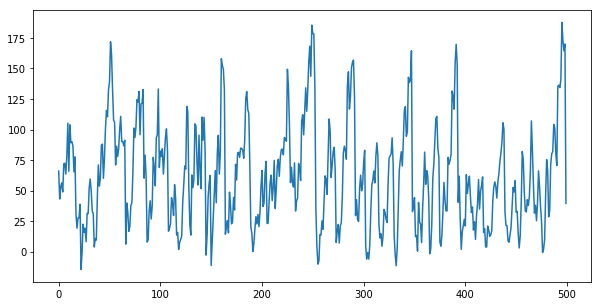

In [27]:
plt.plot(np.arange(len(y_predict)), y_predict)

In [19]:
np.arange(len(y_predict))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

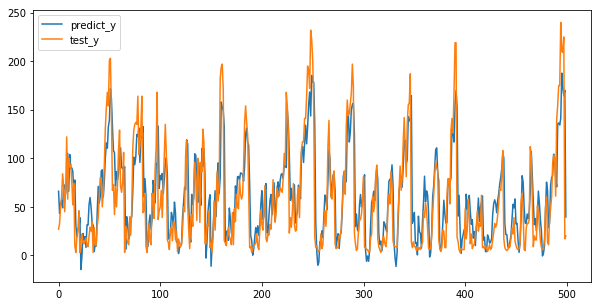

In [28]:
plt.plot(np.arange(len(y_predict)), y_predict, label = "predict_y")
plt.plot(np.arange(len(y_predict)), test_y, label = "test_y")
plt.legend()
plt.show()

In [21]:
m = mean_squared_error(y_predict, test_y)

In [29]:
RMSE = math.sqrt(m)
RMSE

31.003823276418057

# SVR 

In [30]:
from sklearn import svm

In [87]:
n_train_samples = 1000
n_test_samples = 500
train = values[:n_train_samples, :]
test = values[-n_test_samples:, :]
clf = svm.SVR(kernel='rbf', C=1e4, gamma=1e-6)
clf.fit(train_X, train_y)

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-06,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [88]:
y1_predict = clf.predict(test_X)
y1_predict

array([ 59.74276098,  37.52753596,  47.58063171,  50.54398844,
        51.98842216,  71.9591127 ,  70.80461662,  55.35219585,
        71.61685811, 100.47381478,  66.47247252,  94.52561879,
        86.82554849,  86.21510582,  81.98452692,  57.77268659,
        74.00316052,  28.19881385,  13.73193153,  28.11006373,
        30.62208688,  36.17165323,   3.15394609,  11.74509753,
        23.92559567,  14.55647077,  15.86219596,  13.66392637,
        29.22009459,  21.18060251,  31.47967646,  39.79752325,
        36.05336086,  33.03914931,  32.72131165,   9.78980262,
        20.24984364,  16.17424765,  33.99477172,  46.4417036 ,
        45.41179285,  57.64667698,  83.46292561,  79.48664747,
        55.94168876,  67.88482839,  93.82784331, 109.85317729,
       118.6571173 , 137.57238141, 143.63321081, 177.17854144,
       172.41632936, 139.71429141,  94.1846902 ,  86.99202344,
        59.04125376,  76.30496177,  68.02619686,  74.40904476,
        99.8556674 , 109.65953484,  84.28986073,  76.26

In [89]:
m1 = mean_squared_error(y1_predict, test_y)
RMSE1 = math.sqrt(m1)
RMSE1

30.714337186289463

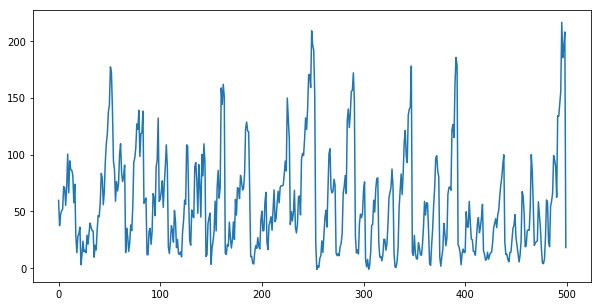

In [90]:
plt.plot(np.arange(len(y1_predict)), y1_predict)

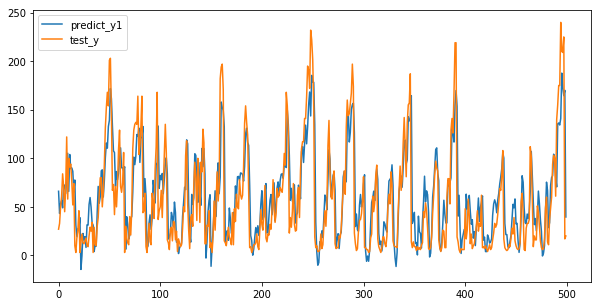

In [91]:
plt.plot(np.arange(len(y_predict)), y_predict, label = "predict_y1")
plt.plot(np.arange(len(y_predict)), test_y, label = "test_y")
plt.legend()
plt.show()